In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
def passive_square(x, y, z, t, xp):
    xc, yc = x - 0.5, y - 0.75
    return xp.where(
        (xp.abs(xc) < 0.15) & (xp.abs(yc) < 0.15),
        1.0,
        0.0,
    )


sim = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.slotted_disk(
        idx, x, y, z, t, rotation="ccw", xp=xp
    ),
    ic_passives={"passive_square": passive_square},
    bcx="ic",
    bcy="ic",
    nx=64,
    ny=64,
    p=3,
    interpolation_scheme="gauss-legendre",
)

sim.run(n=10)

100%|██████████| 10/10 [00:00<00:00, 22.81it/s]


In [3]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(-0.1279964661673785), np.float64(1.1599413587124983))

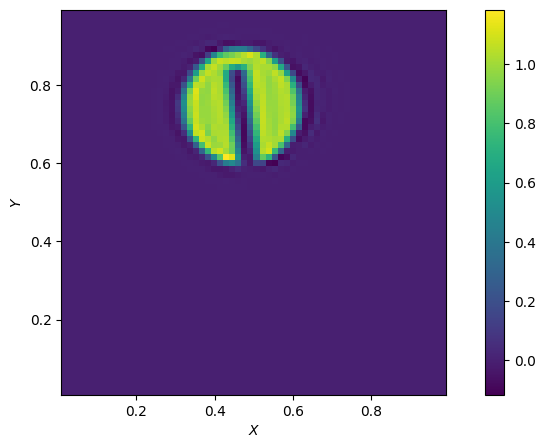

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "rho", x=None, y=None)
# add colorbar
ax.figure.colorbar(ax.images[0], ax=ax)

In [5]:
sim.timer.print_report()

Category                                               Calls      Cumulative Time
-----------------------------------------------------------------------------------
!ExplicitODESolver.integrate.body                          1                 0.46
AdvectionSolver.log_quantity                              12                 0.00
ExplicitODESolver.integrate                                1                 0.48
ExplicitODESolver.take_step                               10                 0.43
FiniteVolumeSolver.f                                      40                 0.43
FiniteVolumeSolver.inplace_apply_bc                      202                 0.11
FiniteVolumeSolver.inplace_compute_fluxes                 40                 0.42
FiniteVolumeSolver.inplace_integrate_fluxes               80                 0.14
FiniteVolumeSolver.inplace_interpolate_faces              80                 0.24
FiniteVolumeSolver.riemann_solver                         80                 0.06
FiniteVolumeSo